# Метод k-средних

Метод k-средних (англ. k-means) — наиболее популярный метод кластеризации. Действие алгоритма таково, что он стремится минимизировать суммарное квадратичное отклонение точек кластеров от центров этих кластеров.

# Лабораторная работа

In [1]:
# Используемые библиотеки

import pandas as pd
import seaborn as sns
from sklearn import datasets
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

#inline matplotlib

In [2]:
# Загружаем датасет

iris = datasets.load_iris()
iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [3]:
def show_heatmap():
    correlation_matrix = iris_df.corr()
    plt.figure(figsize=(10, 8))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
    plt.title('Тепловая карта матрицы корреляций признаков')
    plt.show()

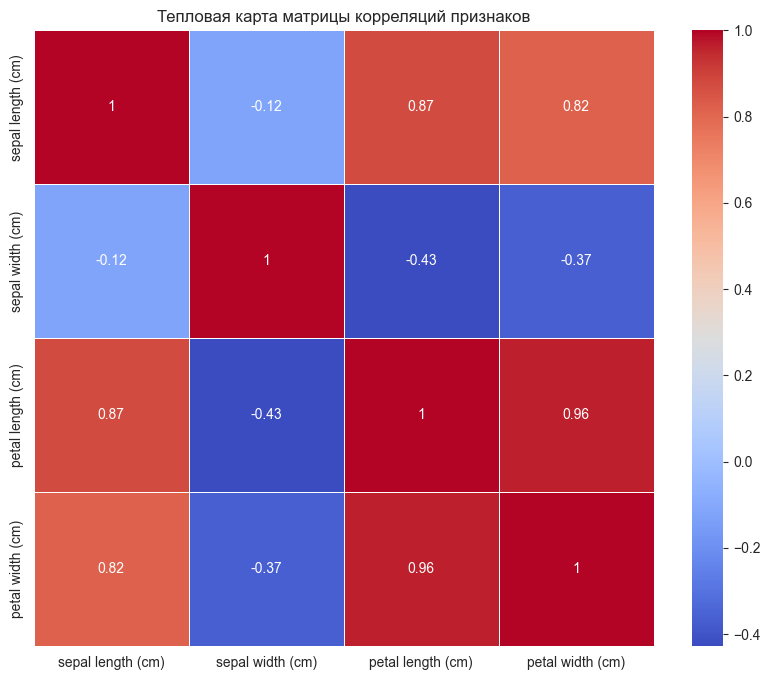

In [4]:
show_heatmap()

In [5]:
# Сократим количество признаков до 2

columns_to_drop = [
    'petal width (cm)',
    'petal length (cm)'
]

iris_df.drop(columns=columns_to_drop, inplace=True)
iris_df

,sepal length (cm),sepal width (cm)
0,5.1,3.5
1,4.9,3.0
2,4.7,3.2
3,4.6,3.1
4,5.0,3.6
...,...,...
145,6.7,3.0
146,6.3,2.5
147,6.5,3.0
148,6.2,3.4


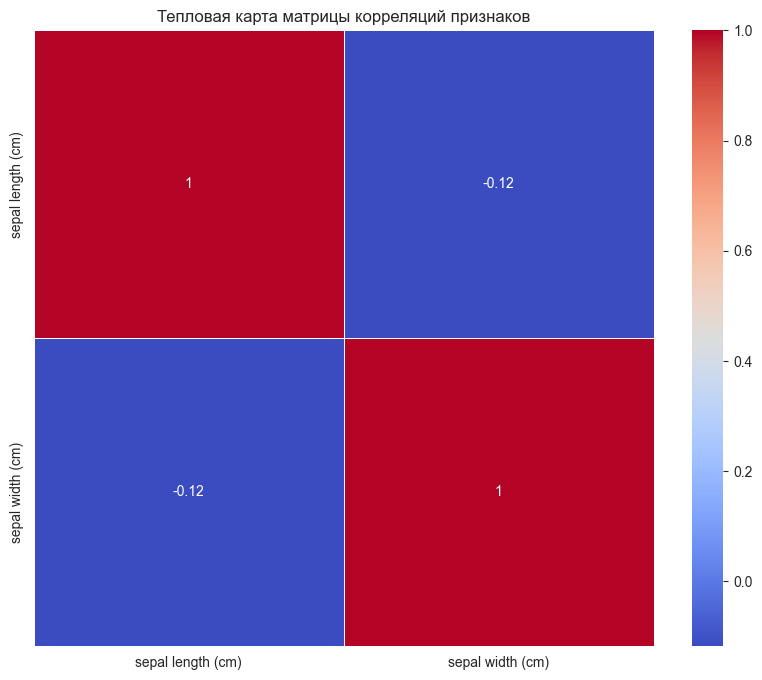

In [6]:
show_heatmap()

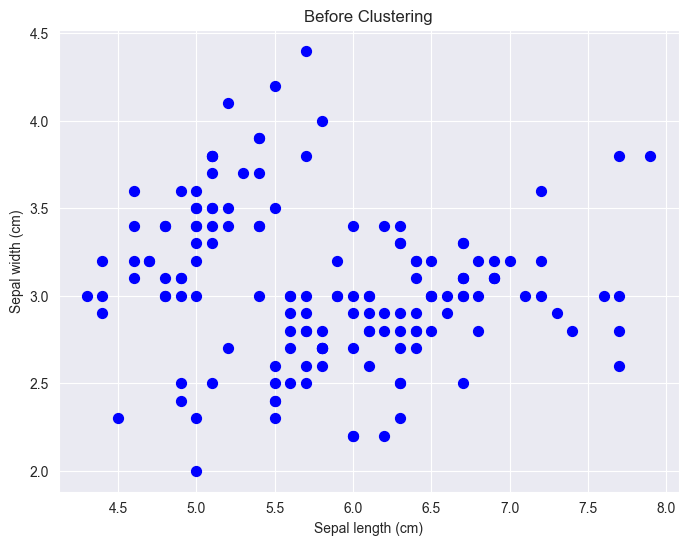

In [7]:
# Визуализация данных до кластеризации

plt.figure(figsize=(8, 6))
plt.scatter(iris_df['sepal length (cm)'], iris_df['sepal width (cm)'], color='blue', s=50)
plt.xlabel('Sepal length (cm)')
plt.ylabel('Sepal width (cm)')
plt.title('Before Clustering')
plt.show()

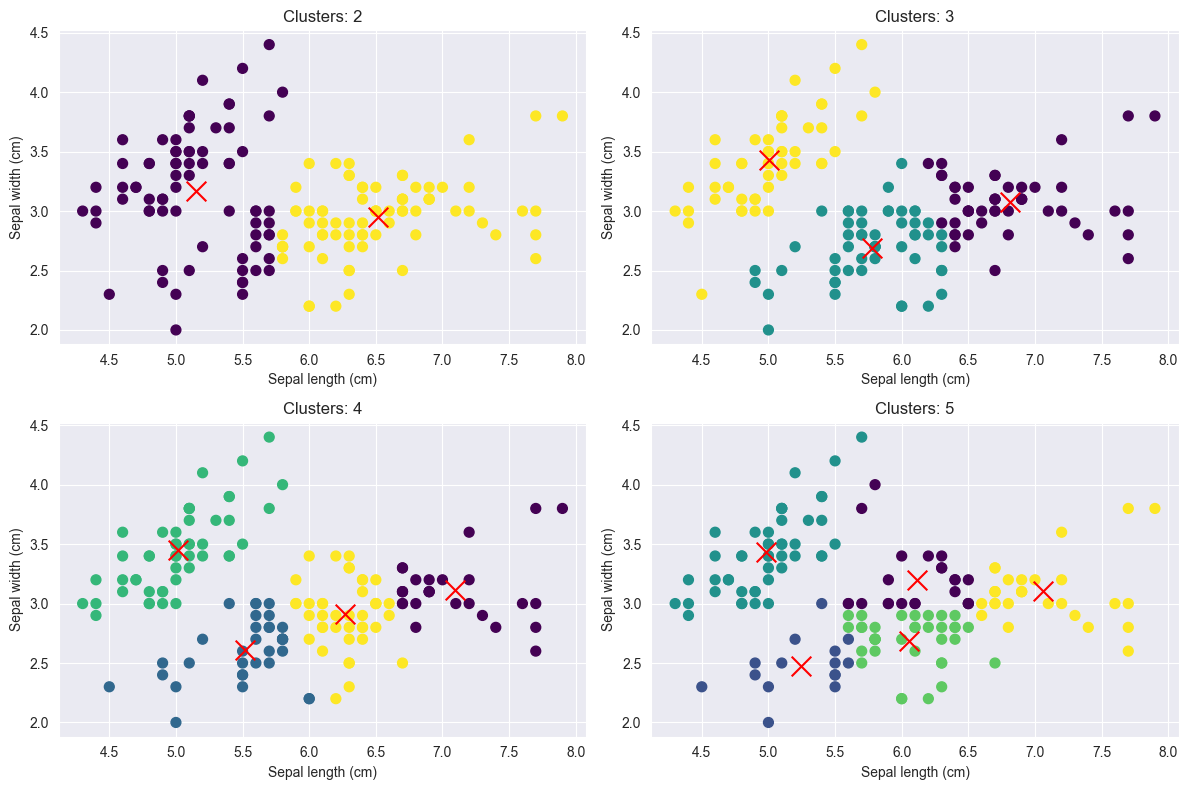

In [8]:
# Кластеризация с KMeans

k_values = range(2, 6)
inertia_values = []

plt.figure(figsize=(12, 8))

for i, k in enumerate(k_values, 1):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(iris_df)
    inertia_values.append(kmeans.inertia_)
    
    labels = kmeans.labels_
    
    plt.subplot(2, 2, i)
    plt.scatter(iris_df['sepal length (cm)'], iris_df['sepal width (cm)'], c=labels, cmap='viridis', s=50)
    plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], marker='x', s=200, c='red')
    plt.xlabel('Sepal length (cm)')
    plt.ylabel('Sepal width (cm)')
    plt.title(f'Clusters: {k}')

plt.tight_layout()
plt.show()

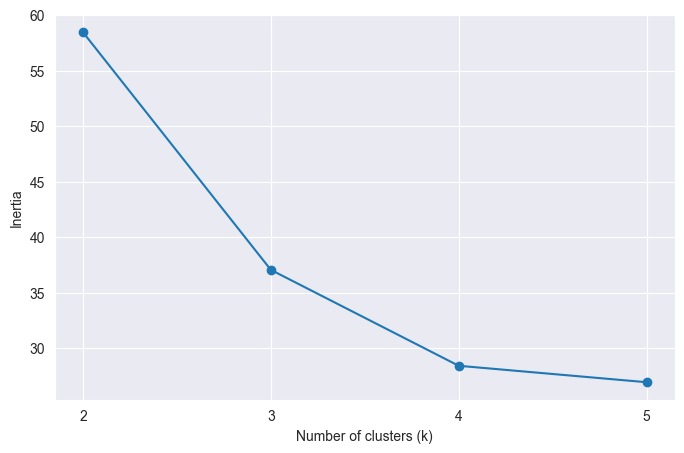

In [9]:
# Визуализация зависимости от числа кластеров по методу локтя

plt.figure(figsize=(8, 5))
plt.plot(k_values, inertia_values, marker='o')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.xticks(k_values)
plt.show()